# Assignment #2 - Classification

<font color="red"> <b> Due: Feb 26 (Monday) 11:00 pm </b> </font>

# Kiran Korey 

# I. Introduction
$\newcommand{\xv}{\mathbf{x}}
 \newcommand{\wv}{\mathbf{w}}
 \newcommand{\Tm}{\mathbf{T}}
 \newcommand{\Xm}{\mathbf{X}}
$
The assignments objective is to implement four types of classification on the chosen data set. Since the samples in the datasets are already labeled, we can use those to properly classify the data.

The classification algorithms we will be using for this assignment are the Pocket Algorithm, QDA (Quantitative Discriminant Analysis), LDA (Linear Discriminant Analysis), and Logistic Regression. For training the algorithms, the Pocket Algorithm and Logistic Regression require a alpha value and a limited number of iterations. While QDA and LDA do not require either of those values.

We will compare these algorithms using the evaluation metrics like Accuracy, Precision,Recall,Specificity,F1 Score,MCC,ROC Area under curve,etc.

Also these algorithms are implemented using Sklearn Library as well to compare the efficiency of coded algorithms.


# II. Data


This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms. Each species is identified as ** edible, poisonous**.

The attribute Information is as follows: **(classes: edible=e, poisonous=p) **

- cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
- cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
- cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
- bruises: bruises=t,no=f
- odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
- gill-attachment: attached=a,descending=d,free=f,notched=n
- gill-spacing: close=c,crowded=w,distant=d
- gill-size: broad=b,narrow=n
- gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
- stalk-shape: enlarging=e,tapering=t
- stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
- stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- veil-color: brown=n,orange=o,white=w,yellow=y
- ring-number: none=n,one=o,two=t
- ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
- spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
- population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
- habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

## Source of the Data 
The data is taken from : https://www.kaggle.com/uciml/mushroom-classification/data

### Reading the Data 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

# Reading data 
df = pd.read_csv("mushrooms.csv",header=0);
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g


### Preprocessing of the Data

Let us preprocess the data and separate the Output class from the data frame.

Lets start with checking for Null values.

In [2]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

There are no null values!!

In [3]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,4,9,9,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,s,w,w,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,5176,4936,4464,4384,7924,7488,3968,2388,4040,3148


Clearly the data has a lot of categorical data, let's convert them to inters using LabelEncoder.

In [4]:
from sklearn import preprocessing
lbl = preprocessing.LabelEncoder()
for f in range(22):
    df.iloc[:,f] = lbl.fit_transform(df.iloc[:,f])

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


Let's check if there are any missing values.

In [5]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
missing_df

,column_name,missing_count


In [6]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.575086,1.603644,5.816347,5.794682,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.621459,0.675974,1.901747,1.907291,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,1.000000,6.000000,6.000000,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,3.000000,8.000000,8.000000,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


Lets see how the output data is placed with respect to any one feature.
consider **stalk-color-above-ring** as the feature.

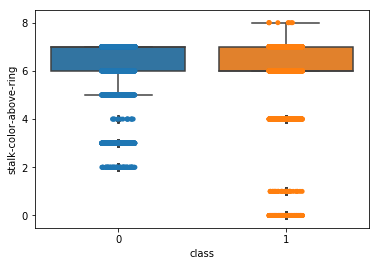

In [7]:
import seaborn as sns
ax = sns.boxplot(x='class', y='stalk-color-above-ring', 
                data=df)
ax = sns.stripplot(x="class", y='stalk-color-above-ring',
                   data=df, jitter=True,
                   edgecolor="gray")

Looks like the data is well placed, Lets plot with one other feature to be double sure.

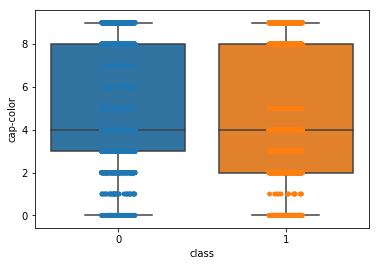

In [8]:
ax = sns.boxplot(x='class', y='cap-color', 
                data=df)
ax = sns.stripplot(x="class", y='cap-color',
                   data=df, jitter=True,
                   edgecolor="gray")

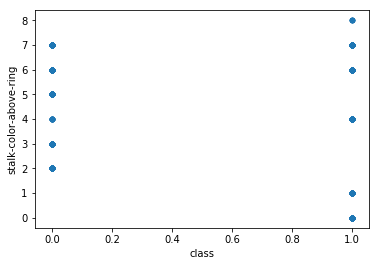

In [9]:
df.plot(kind='scatter', x='class', y='stalk-color-above-ring')

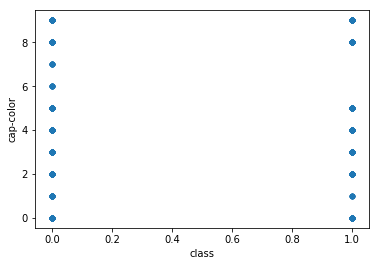

In [10]:
df.plot(kind='scatter', x='class', y='cap-color')

Okay, thats Good.

Let's partition the data now and separate the output class. 

In [11]:
def partition_data(X,T,ratio=[0.8,0.2]):
        assert(np.sum(ratio) == 1)
    
        idxs = np.random.permutation(X.index)
        N = X.shape[0]
    
        X_ = []
        T_ = []
    
        i = 0
        for j, r in enumerate(ratio):
            rows = int(round(N * r))
            if j == len(ratio) -1:
               X_.append(X.iloc[i:, :])
               T_.append(T.iloc[i:, :])        
            else:
                X_.append(X.iloc[i:i+rows, :])
                T_.append(T.iloc[i:i+rows, :])
        
            i+= rows
    
        return X_, T_

In [12]:
from sklearn.model_selection  import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df[df.columns[1 :]], df.loc[:,'class'], test_size=0.2,train_size=0.8)
Y_train = np.where(Y_train == 1,-1,1)
Y_test =  np.where(Y_test == 1,-1,1)
print(Y_train,Y_test)
X_train.head()

[-1  1  1 ..., -1  1  1] [ 1 -1  1 ...,  1 -1 -1]


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
6054,5,3,2,0,2,1,0,1,0,1,...,2,1,7,6,2,1,0,7,4,2
2434,5,0,3,1,5,1,0,0,7,1,...,2,2,3,7,2,1,4,2,4,0
483,2,0,3,0,5,1,0,1,2,0,...,2,2,7,7,2,1,4,2,5,5
6278,5,2,2,0,2,1,0,1,0,1,...,1,1,6,7,2,1,0,7,4,4
6827,5,2,3,0,5,1,1,0,10,0,...,1,2,7,7,2,2,4,7,2,1


In [13]:
# Xdata, Tdata = partition_data(pd.DataFrame(df.iloc[:,1:]), pd.DataFrame(df.loc[:,'class']))
# #Partitioning the dataset into train and test set with 80% in train and 20% in test 
# X_train, X_test = [x_.as_matrix() for x_ in Xdata]
# Y_train, Y_test = [t_.as_matrix() for t_ in Tdata]

# III. Method
 
The superclass, Classifier, was used to aid in the implementation of all four classification algorithms (pocket,QDA,LDA, and linear regression). To help account for biased factor, a add_ones method is included.

__Pocket Classifier__

$$
\wv^{(k+1)} = \wv^{(k)} + \alpha t_i \xv_i
$$

 - Takes in data (X) to train the model. This data is then used to create a weight matrix (w) that will be used in a dot product along with input data. The result will then go through a step function to try and figure out which classification the data best fits into.
 - The primary issue with this classifier is that it can only take binary data in the form of 1 or -1. This limits the data classifications.
 - The use method returns a list of the predicted outputs (Y) that is created by calculating the dot product of X and w and adding bias.
    
__QDA Classifier__

$$
\delta_k(\xv) = -\frac{1}{2} \ln \vert \boldsymbol\Sigma_k \vert - \frac{1}{2} (\xv - \boldsymbol\mu_k)^\top \boldsymbol\Sigma_k^{-1} (\xv - \boldsymbol\mu_k) + \ln P(T = k). 
$$


 - Requires no alpha or a number for limited iterations. QDA only requires training data with input matrix (X) and the target value matrix (T)
 - No conversion is needed due to how QDA is capable of workibng on multiple classes
 - The mu, sigma, and prior are found by grouping data into a list of lists and running the calculations on each sublist.
    
__LDA Classifier__

$$
\delta_k(\xv) = \xv^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_+ -\frac{1}{2} \boldsymbol\mu_+^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_k + \ln P(T = k).
$$

 - Very similar to QDA classifier since it requires the same data matrices X and T, while also not requiring alpha and limited iterations
 - However, LDA is computationally cheaper due to not having to manage covariance matrix
 - Similarly to QDA, no conversion is required
    
__Linear Regression Classifier__

$$
\wv \leftarrow \wv + \alpha \Xm^\top \Big(  \Tm - g(\Xm)\Big).
$$

 - Similar to the Pocket algorithm since it requires alpha and a limited number of iterations
    Primary difference between LR and Pocket algorithm is that instead of using a step function, as the pocket algorithm does, linear regression uses a softmax function
    
__Evaluation Methods__

- **Accuracy** : It is the percentage of correct classifications.

$$
   \text{Accuracy} = \frac{\text{The number of correct classification}}{\text{The number of samples}}.
$$

- **Precision**: The accuracy of positive predictions. We can read this as *the ratio that my positive prediction is correct*.

$$
\text{precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
$$

- **Recall** (Sensitivity or True Positive Rate): This measure give you how the model's prediction covers the positive class. 

$$
\text{recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$

- **Specificity** (True Negative Rate): Considering imblance or difference in class, we consider TNR as well. 

$$
\text{Specificity} = \frac{\text{TN}}{\text{TN} + \text{FP}}
$$

- **F1 Score** : The harmonic mean of precision and recall. 

$$
\begin{align*}
F_1 &= \Bigg( \frac{\frac{1}{precision} + \frac{1}{recall}}{2} \Bigg)^{-1} \\
\\
    &= 2 \times \frac{precision \times recall}{precision + recall} \\
    \\
    &= \frac{TP}{TP + \frac{FN+FP}{2}}
\end{align*}
$$

- **MCC** (Matthews Correlation Coefficient): MCC uses all the counts in confusion matrix for the metric. 

$$
MCC = \frac{TP \times TN – FP \times FN}{\sqrt{(TP +FP) \times (TP + FN) \times (TN + FP) \times (TN + FN)}}
$$

- **ROC** : The ROC curve is another popular tool for binary classifications. The ROC curve plots the true positive rate (recall) vs the false positive rate (1 - specificity). 

- **AUC** : AUC measures the area to represent it with a numeric value by simply computing the area under the curve. AUC values are used also for various graphical measurement such as PR (Precision-Recall) curve.

- **Confusion Matrix** : Here, each row represents the predictions from model and column represents the actual classes.

| - | + 
 --|--|--
 - | True Negative (TN) | False Negative (FN)
 + | False Positive (FP) | True Positive (TP)



### A. Super Classs Definition

This is the base class for all the classifiers. It has normalize method, add_ones method and check matix method whichh will help other classes which extend this class

In [14]:
import numpy as np
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)

        # TODO: Finish this normalization
        Xs = (X - self.meanX) / self.stdX
        return Xs

#     def normalize(self, X):
#         mu = X.mean()
#         std = X.std()
#         print("mu in norm",mu)
#         print("std in norm",std)
#         return (X-mu)/std

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    abstractmethod
    def train(self, X, T):
        pass
    
    abstractmethod
    def use(self, X):
        pass 

### B. Pocket Algorithm

In [15]:
from copy import deepcopy as copy 
# Pocket Algorith
class Pocket(Classifier):
    


    def __init__(self,alpha):
        Classifier.__init__(self)
        self.w=None
        self.w_pocket=None
        self.alpha = alpha
        
    # return 1 if w is better -1 if wp is better
    def compare(self,X, T, w, wp):
        y = np.sign(X @ w)
        yp = np.sign(X @ wp)
        return 1 if np.sum(y == T) >= np.sum(yp == T) else -1

    # train Pocket Algorithm
    def train(self, X, T):
        Xs= self.normalize(X)
        maxiter = 100#1000
        N = X.shape[0]
        if(self.w is None):
            self.w = np.zeros(Xs.shape[1]) 
            self.w_pocket = copy(self.w)
        for i in range(maxiter):
            converged = True
            for k in np.random.permutation(N): #range(N):
                y = self.w @ Xs[k,:]
                if np.sign(y) != np.sign(T[k]):
                    self.w += self.alpha * T[k] * Xs[k,:]
                    converged = False
                    ##### additional for pocket algorithm 
                    if self.compare(Xs, T, self.w, self.w_pocket) > 0: 
                        self.w_pocket[:] = self.w[:]

            if converged:
                print("converged at ", i)
                break
        
    
    # apply the learned model to data X
    def use(self, X):
        #print("use w_pocket",self.w_pocket)
        Xs = (X - self.meanX) / self.stdX
        return Xs@self.w_pocket

### C. QDA

In [16]:
# QDA Classifier
class QDA(Classifier):
    
    def __init__(self):
        Classifier.__init__(self)
        self.mu = []
        self.Sigma = []
        self.prior = []
        
    def discriminant(self,X, mu, sigma, prior):
        sigma_inv = np.linalg.inv(sigma)
        diffv = X - mu
        return -0.5  * np.log(np.linalg.det(sigma)) \
                - 0.5 * np.sum(diffv @ sigma_inv * diffv, axis=1) \
                + np.log(prior)
                    
    def train(self, X, T):
        Xs = self.normalize(X)
        N = Xs.shape[0]
        for c in np.unique(T):
            c = T==c
            mu = np.mean(Xs[c,:],0)
            Sigma = np.cov(Xs[c].T)
            prior = np.sum(c) / N
            
            self.mu.append(mu)
            self.Sigma.append(Sigma)
            self.prior.append(prior)
            
    def use(self, X):
        Xs = (X-self.meanX)/self.stdX
        d = []
        for i in range(len(self.mu)):
            d.append(self.discriminant(Xs, self.mu[i], self.Sigma[i], self.prior[i]))
        return d


### D. LDA

In [17]:
# LDA Classifier
class LDA(Classifier):
    
    def __init__(self):
        Classifier.__init__(self)
        self.mu = []
        self.Sigma = []
        self.prior = []        

    def discriminant(self, X, mu, sigma, prior):
        sigInv = np.linalg.inv(sigma)
        return X@sigInv@mu - .5*mu.T@sigInv@mu + np.log(prior)
                    
    def train(self, X, T):
        Xs = self.normalize(X)
        N = Xs.shape[0]
        self.Sigma = np.cov(Xs.T)
        for c in np.unique(T):
            c = T==c
            mu = np.mean(Xs[c,:],0)
            prior = np.sum(c) / N
            
            self.mu.append(mu)
            self.prior.append(prior)
        
            
    def use(self, X):
        Xs = (X-self.meanX)/self.stdX
        d = []
        for i in range(len(self.mu)):
            d.append(self.discriminant(Xs, self.mu[i], self.Sigma, self.prior[i]))
        return d


### E. Logistic Regression

In [18]:
# LogisticRegression Class
from copy import deepcopy as copy
class LogRegression(Classifier): 
    """ 
        Logistic Regression class 
        
        attributes
        ===========
        
    """
    def __init__(self,alpha):
        Classifier.__init__(self)
        self.w = None
        self.alpha = alpha
    
    def softmax(self,z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z) 
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))

    def g(self,X, w):
        return self.softmax(X @ w) 
        
    def train(self, X, T):
        X = self.normalize(X)
       
        N = X.shape[0]
        D = X.shape[1]
        K = len(np.unique(T))
        
        self.w = np.random.rand(D+1, K)
        niter = 10
        X = self.add_ones(X)
        
        T = self.add_ones(T.reshape(-1,1))
        
        for step in range(niter):
            for i in range(N):
                ys = self.g(X,self.w)
                self.w += self.alpha * X.T @ (T - ys)  
              
    
    # apply the learned model to data X
    def use(self, X):
        Xs = (X - self.meanX)/self.stdX
        Xs = self.add_ones(Xs)
        return self.g(Xs, self.w)

### F. Comparission 

In [19]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


def accuracy(Y,T):
    return np.sum(Y == T)/len(Y)

def precision(cfm):
    cfm = cfm.as_matrix()
    cfm = np.float64(cfm)
    return cfm[1, 1] / (cfm[1, 1] + cfm[1, 0])

def recall(cfm):
    cfm = cfm.as_matrix()
    cfm = np.float64(cfm)
    return cfm[1, 1] / (cfm[1, 1] + cfm[0,1])

def specificity(cfm):
    cfm = cfm.as_matrix()
    cfm = np.float64(cfm)
    return cfm[0,0]/(cfm[0,0]+cfm[1,0])

def f1Score(cfm):
    cfm = cfm.as_matrix()
    cfm = np.float64(cfm)
    return cfm[1,1] / cfm[1,1] + ((cfm[0,1]+cfm[1,0])/2)

# TN= cfm[0,0]
# FN= cfm[0,1]
# FP= cfm[1,0]
# TP= cfm[1,1]
def MCC(cfm):
    cfm = cfm.as_matrix()
    cfm = np.float64(cfm)
    return (cfm[1,1] * cfm[0,0]) - (cfm[1,0] * cfm[0,1]) \
    / np.sqrt((cfm[1,1] +cfm[1,0]) * (cfm[1,1] + cfm[0,1]) * (cfm[0,0] + cfm[1,0]) * (cfm[0,0] + cfm[0,1]))

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1.02])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

def roc(prob,Y):
    fpr, tpr, thresholds = roc_curve(Y, prob)
    plt.figure(figsize=(8, 6))
    plot_roc_curve(fpr, tpr)
    plt.show()
    
def roc_auc(prob,Y):
    return roc_auc_score(Y, prob)


def confusion_matrix(Y, T):
    """
        Y    nd.array
             predicted labels
        T    nd.array
             target labels
             
        @cfm DataFrame
             confusion matrix
    """
    
    if len(Y) != len(T):
        raise ValueError("Wrong prediction and target length!")
    
    classes = np.unique(T)
    n_classes = len(classes)
    
    cfm = pd.DataFrame(np.zeros((n_classes, n_classes)), index=classes, columns=classes, dtype=int)
    
    Tidx = [T == c for c in classes]
    for c in classes:
        pred_idx = Y == c
        cfm.loc[c, :] = [np.sum(np.logical_and(pred_idx, tidx)) for tidx in Tidx]
    
    return cfm

def plotClassifedResult(Y,T):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(T, 'o', color='b', label='Real',linewidth=5) 
    ax.plot(Y, '.', color='r', label='Predicted')
    ax.set_xlabel('Index')
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels)
    plt.show()
                                                     
def allStats(Y,T):
    cfm = confusion_matrix(Y,T)
    display(cfm)
    display(pd.DataFrame([['TN','FN'],['FP','TP']],index=["-","+"],columns=["-","+"]))
    stats = [accuracy(Y,T),precision(cfm),recall(cfm),specificity(cfm),f1Score(cfm),MCC(cfm),roc_auc(Y,T)]
    display(pd.DataFrame(stats,index=["Accuracy","Precision","Recall","Specificity","F1 Score","MCC","ROC_AUC"],columns=["Stats"]))
    plotClassifedResult(Y,T)
    roc(Y,T)
    return stats 

def compStats(Y,T):
    cfm = confusion_matrix(Y,T)
    stats = [accuracy(Y,T),precision(cfm),recall(cfm),specificity(cfm),f1Score(cfm),MCC(cfm),roc_auc(Y,T)]
    return stats 

# IV. Experiments

The following section consists of the classification results and it's respective slots, followed by their comparisions.
Since we cannot be sure of the results of a single metrics the algorithms are compared using **Accuracy,Precision,Recall,Specificity,F1 Score,MCC,ROC_AUC**

** Applying Pocket Algorithm on the partitioned data **

Confusion Matix


,-1,1
-1,178,7
1,12,203


,-,+
-,TN,FN
+,FP,TP


,Stats
Accuracy,0.952500
Precision,0.944186
Recall,0.966667
Specificity,0.936842
F1 Score,10.500000
MCC,36133.997891
ROC_AUC,0.951754


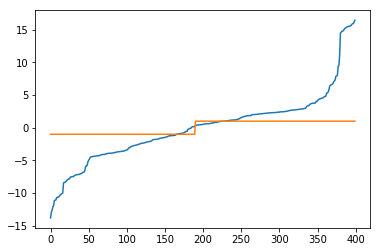

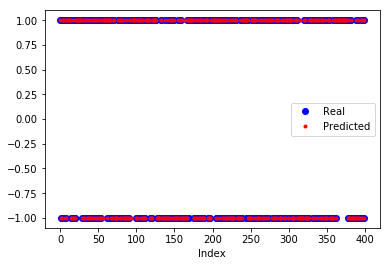

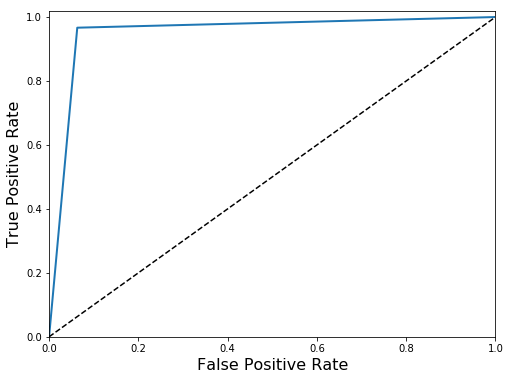

In [20]:
pa = Pocket(0.1) 
pa.train(X_train[:400],Y_train[:400])
Y_pa = pa.use(X_test[:400])
plt.plot(np.sort(Y_pa,0))
plt.plot(np.sort(Y_test[:400],0))
print("Confusion Matix")
pa_stats = allStats(np.sign(Y_pa), Y_test[:400])

** Pocket Algorithm gives a 95 % accuracy but has F1 Score of 11 and ROC area is 95% **

** Applying QDA on the partitioned data **

Count of wrong Classified data  4


,-1,1
-1,186,0
1,4,210


,-,+
-,TN,FN
+,FP,TP


,Stats
Accuracy,0.990000
Precision,0.981308
Recall,1.000000
Specificity,0.978947
F1 Score,3.000000
MCC,39060.000000
ROC_AUC,0.989474


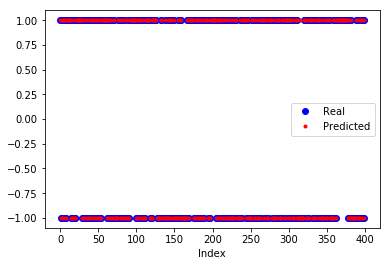

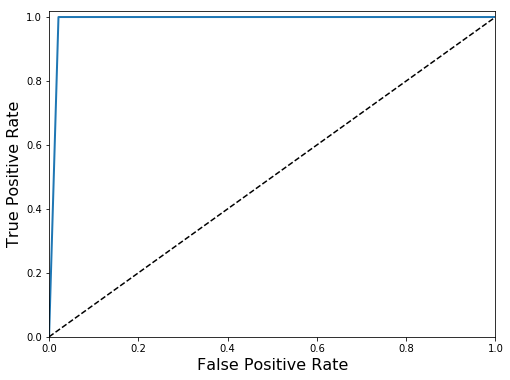

In [21]:
qda = QDA()
qda.train(X_train,Y_train)
D1=[]
D2=[]
D1=qda.use(X_test[:400])
D2 = np.argmax(np.array(D1),axis=0)
D2=np.where(D2==0,-1,1)
errQda = (D2==Y_test[:400])
print("Count of wrong Classified data ",np.size(errQda) - np.count_nonzero(errQda))
qda_stats = allStats(D2, Y_test[:400])



Text(0.5,0,'QDA P(x|Class=k)\n from disc funcs')

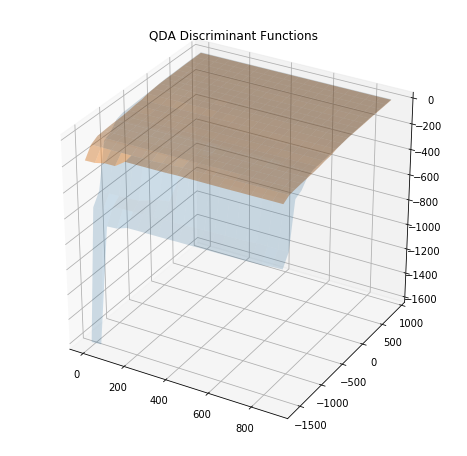

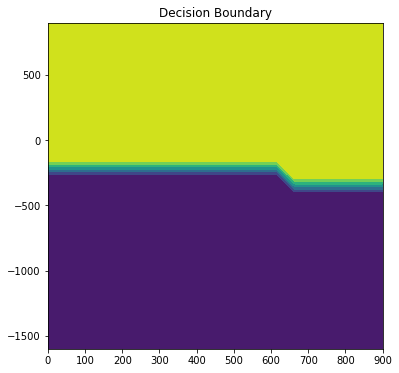

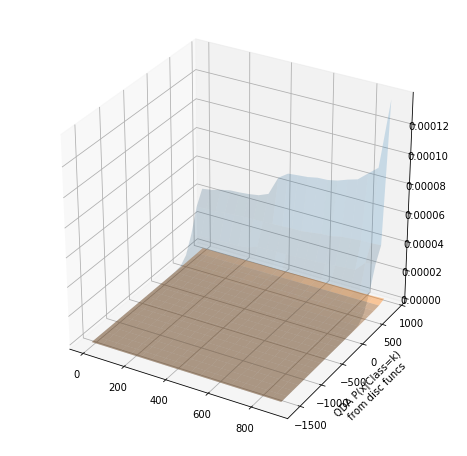

In [22]:
xs, ys = np.meshgrid(np.linspace(0,900, 20), np.linspace(-1600,900, 20))

fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
ax.plot_surface(xs, ys, (np.sort(D1[0])).reshape(xs.shape), alpha=0.2)
ax.plot_surface(xs, ys, (np.sort(D1[1])).reshape(xs.shape), alpha=0.4)
plt.title("QDA Discriminant Functions")

plt.figure(figsize=(6,6))
plt.contourf(xs, ys, (np.sort(D1[0]-D1[1]) > 0).reshape(xs.shape))
plt.title("Decision Boundary")

# Plot generative distributions  p(x | Class=k)  starting with discriminant functions

fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')

prob1 = np.exp( np.sort(D1[0]).reshape(xs.shape) - 0.5*X_train.shape[1]*np.log(2*np.pi) - np.log(qda.prior[0]))
prob2 = np.exp( np.sort(D1[1]).reshape(xs.shape) - 0.5*X_train.shape[1]*np.log(2*np.pi) - np.log(qda.prior[1]))
ax.plot_surface(xs, ys, prob1, alpha=0.2)
ax.plot_surface(xs, ys, prob2, alpha=0.4)


plt.ylabel("QDA P(x|Class=k)\n from disc funcs", multialignment="center")

** QDA has 99 % of accuracy and area under ROC is 99 % ** 

** QDA using Sklearn Library **

Count of wrong Classified data 4


,-1,1
-1,186,0
1,4,210


,-,+
-,TN,FN
+,FP,TP


,Stats
Accuracy,0.990000
Precision,0.981308
Recall,1.000000
Specificity,0.978947
F1 Score,3.000000
MCC,39060.000000
ROC_AUC,0.989474


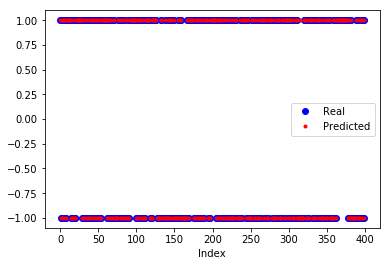

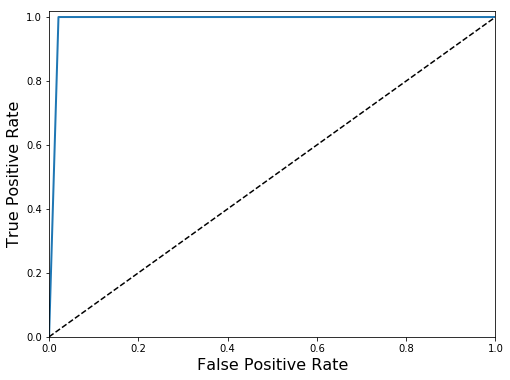

In [23]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda1 = QuadraticDiscriminantAnalysis()
qda1.fit(X_train, Y_train)
dSQda = qda1.predict_proba(X_test[:400])
sQD2 = np.argmax(np.array(dSQda),axis=1)
sQD2=np.where(sQD2==0,-1,1)
serrQda = (sQD2==Y_test[:400])
print("Count of wrong Classified data",np.size(serrQda) - np.count_nonzero(serrQda))
qda_sklearn_stats = allStats(sQD2, Y_test[:400])

** Applying LDA on the partitioned data ** 

Count of wrong Classified data 21


,-1,1
-1,176,7
1,14,203


,-,+
-,TN,FN
+,FP,TP


,Stats
Accuracy,0.947500
Precision,0.935484
Recall,0.966667
Specificity,0.926316
F1 Score,11.500000
MCC,35727.997538
ROC_AUC,0.946491


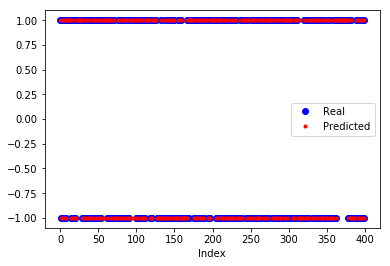

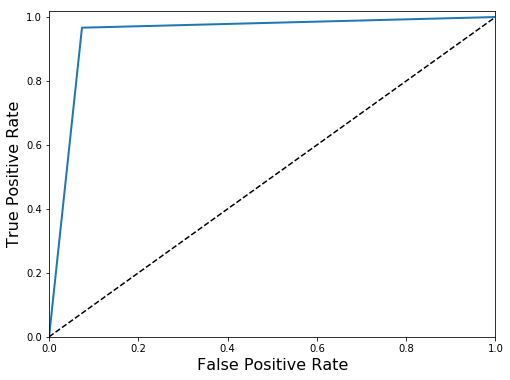

In [24]:
lda = LDA()
lda.train(X_train,Y_train)
LD1=[]
LD2=[]
LD1=lda.use(X_test[:400])
LD2 = np.argmax(np.array(LD1),axis=0)
LD2=np.where(LD2==0,-1,1)
errLda = (LD2==Y_test[:400])
print("Count of wrong Classified data",np.size(errLda) - np.count_nonzero(errLda))
lda_stats = allStats(LD2, Y_test[:400])

Text(0.5,0,'LDA P(x|Class=k)\n from disc funcs')

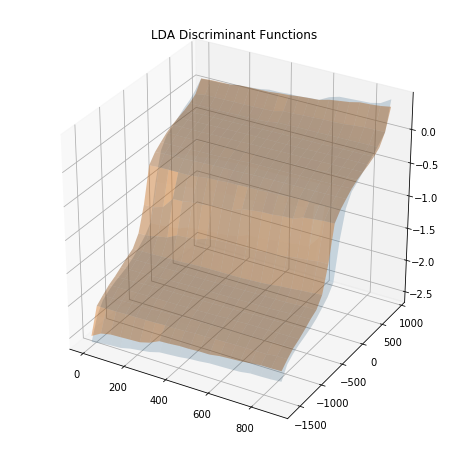

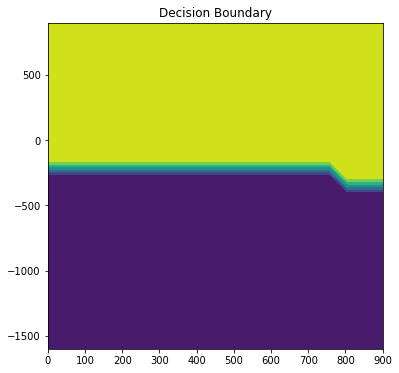

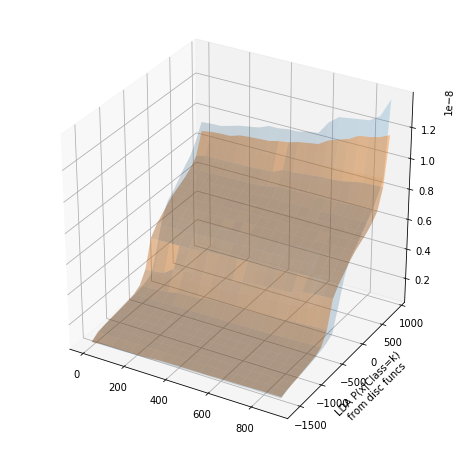

In [25]:
xs, ys = np.meshgrid(np.linspace(0,900, 20), np.linspace(-1600,900, 20))

fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
ax.plot_surface(xs, ys, (np.sort(LD1[0])).reshape(xs.shape), alpha=0.2)
ax.plot_surface(xs, ys, (np.sort(LD1[1])).reshape(xs.shape), alpha=0.4)
plt.title("LDA Discriminant Functions")

plt.figure(figsize=(6,6))
plt.contourf(xs, ys, (np.sort((LD1[0]-LD1[1]) > 0)).reshape(xs.shape))
plt.title("Decision Boundary")

# Plot generative distributions  p(x | Class=k)  starting with discriminant functions

fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')

prob1 = np.exp( np.sort(LD1[0]).reshape(xs.shape) - 0.5*X_train.shape[1]*np.log(2*np.pi) - np.log(lda.prior[0]))
prob2 = np.exp( np.sort(LD1[1]).reshape(xs.shape) - 0.5*X_train.shape[1]*np.log(2*np.pi) - np.log(lda.prior[1]))
ax.plot_surface(xs, ys, prob1, alpha=0.2)
ax.plot_surface(xs, ys, prob2, alpha=0.4)


plt.ylabel("LDA P(x|Class=k)\n from disc funcs", multialignment="center")

** LDA has 95 % Acuuracy but F1 Score of 11 **

** LDA using Sklearn Library **

Count of wrong Classified data 21


,-1,1
-1,176,7
1,14,203


,-,+
-,TN,FN
+,FP,TP


,Stats
Accuracy,0.947500
Precision,0.935484
Recall,0.966667
Specificity,0.926316
F1 Score,11.500000
MCC,35727.997538
ROC_AUC,0.946491


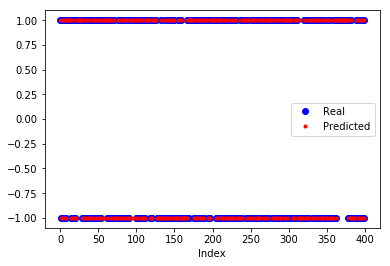

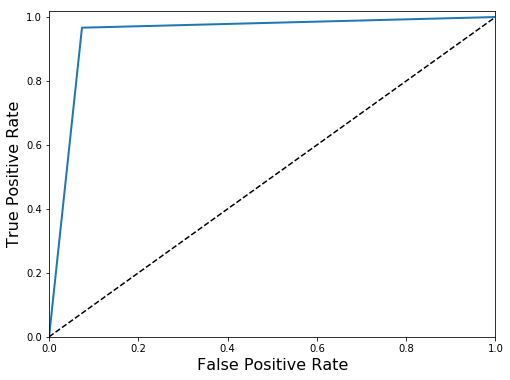

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
slda = LinearDiscriminantAnalysis(n_components=2)
slda.fit(X_train, Y_train)
dSLda = slda.predict_proba(X_test[:400])
sLD2 = np.argmax(np.array(dSLda),axis=1)
sLD2=np.where(sLD2==0,-1,1)
serrLda = (sLD2==Y_test[:400])
print("Count of wrong Classified data",np.size(serrLda) - np.count_nonzero(serrLda))
lda_sklearn_stats = allStats(sLD2, Y_test[:400])

** Applying Logistic Regression on the partitioned data ** 

(400, 2)
(400,)
(400,)


,0,1
0,188,112
1,2,98


,-,+
-,TN,FN
+,FP,TP


,Stats
Accuracy,0.715000
Precision,0.980000
Recall,0.466667
Specificity,0.989474
F1 Score,58.000000
MCC,18423.993526
ROC_AUC,0.728070


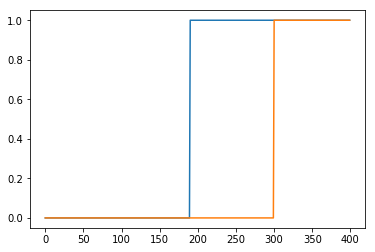

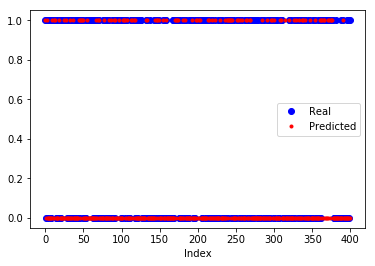

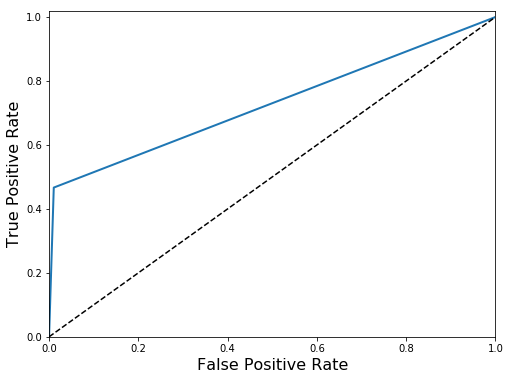

Text(0.5,1,'Decision Boundary')

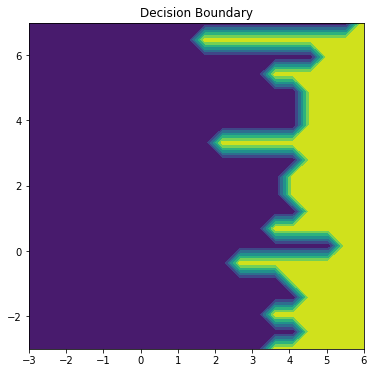

In [27]:
lr = LogRegression(0.00001)
lr.train(X_train[:400],Y_train[:400])
LR1=[]
LR2=[]
LR1=lr.use(X_test[:400])
print(LR1.shape)
Yl = np.argmax(LR1, 1)
print(Yl.shape)
Tl=np.where(Y_test==-1,0,1)
plt.plot(np.sort(Tl[:400],0))
plt.plot(np.sort(Yl))
print(Tl[:400].shape)
# print("Accuracy: ", 100 - np.mean(np.abs(Tl[:100] - Yl)) * 100, "%")
lr_stats = allStats(Yl, Tl[:400])

x = np.linspace(-3, 6, 20)
y = np.linspace(-3, 7, 20)

xs, ys = np.meshgrid(x, y)

plt.figure(figsize=(6,6))
plt.contourf(xs, ys, np.sort(Yl.reshape(xs.shape)))
plt.title("Decision Boundary")

** Logistic Regession has Accuracy of  72% **

** Logistic Regression using Sklearn Library **

0.9475


,0,1
0,177,8
1,13,202


,-,+
-,TN,FN
+,FP,TP


,Stats
Accuracy,0.947500
Precision,0.939535
Recall,0.961905
Specificity,0.931579
F1 Score,11.500000
MCC,35753.997389
ROC_AUC,0.946742


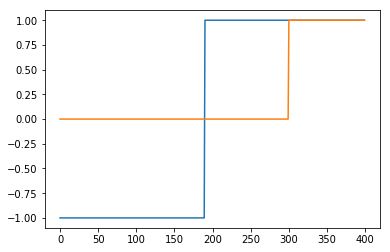

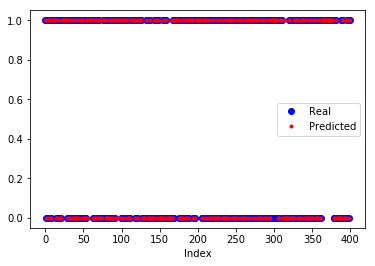

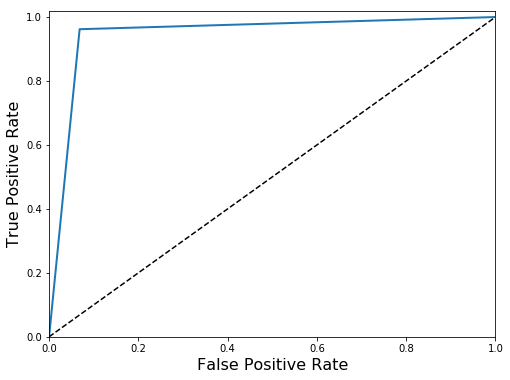

Text(0.5,1,'Decision Boundary')

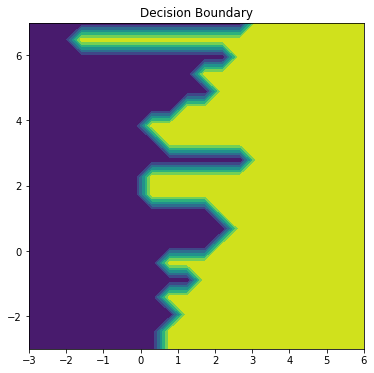

In [28]:
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression()
lr1.fit(X_train[:400],Y_train[:400])
dLra = lr1.predict_proba(X_test[:400])
print(lr1.score(X_test[:400],Y_test[:400]))
sYl = np.argmax(dLra, 1)
Tl=np.where(Y_test==-1,0,1)

plt.plot(np.sort(Y_test[:400],0))
plt.plot(np.sort(Yl))

# print("Accuracy: ", 100 - np.mean(np.abs(Tl[:100] - Yl)) * 100, "%")
slr_stats = allStats(sYl, Tl[:400])
x = np.linspace(-3, 6, 20)
y = np.linspace(-3, 7, 20)

xs, ys = np.meshgrid(x, y)

plt.figure(figsize=(6,6))
plt.contourf(xs, ys, np.sort(sYl.reshape(xs.shape)))
plt.title("Decision Boundary")

In [29]:
# PA
pa_comp = np.vstack(compStats(np.sign(Y_pa), Y_test[:400]))
# QDA
qda_comp = np.vstack(compStats(D2, Y_test[:400]))
# LDA
lda_comp = np.vstack(compStats(LD2, Y_test[:400]))
# LR
lr_comp = np.vstack(compStats(Yl, Tl[:400]))
stats=[]
stats=np.hstack((pa_comp,qda_comp,lda_comp,lr_comp))

display(pd.DataFrame(stats,index=["Accuracy","Precision","Recall","Specificity","F1 Score","MCC","ROC_AUC"],
                     columns=["PA","QDA","LDA","LR"]))

,PA,QDA,LDA,LR
Accuracy,0.952500,0.990000,0.947500,0.715000
Precision,0.944186,0.981308,0.935484,0.980000
Recall,0.966667,1.000000,0.966667,0.466667
Specificity,0.936842,0.978947,0.926316,0.989474
F1 Score,10.500000,3.000000,11.500000,58.000000
MCC,36133.997891,39060.000000,35727.997538,18423.993526
ROC_AUC,0.951754,0.989474,0.946491,0.728070


** So comparing all the Algorithms, from the above table it is evident that
QDA gives better results for the chosen data set, as it has high Accuracy rate of 99.25% 
and Low F1 Score and also ROC Auc is 99.201% **

Since it is just a two class classifier the performance of PA is in line with QDA.

# Conclusions

Summarize your work here. 
Which classifier do you think the best? 
- For the chosen data set QDA is the best, because of the reason mentioned above.
Discuss the challenges or somethat that you learned.
- The challenges that i faced was to implement QDA, as there was very less theoretical explanation given, it often becomes difficult to interpret the results that we obtain.
If you have any suggestion about the assignment, you can write about it. 
- I think the workload has to be reduced a little, cos it took like 5 days to complete just 1 assignment, along with that we have to do reading assignments plus projects as well.
- So please do reduce the workload for further assignments.
- Also the point to be remembered is that there many of us who are very new to these topics and also to python as well, so it becomes a burden.

# References

- kaggle
- StackOverFlow
- Matplot Library: https://matplotlib.org
- Random sites

# Extra Credit

Search for a ordinal data set and apply your classifiers to it. 
Repeat the experiments on it. 
Do you have different observation from previous results? 
Were you able to observe that we discussed in class about logistic regression? 
For a full extra credit point, you need to discuss all bullet points in Results section.     

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes. 


points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
15 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
25 | Methods | 
 |10| Summary of Classification models
 | 5| Explanation of codes
 |10| Pocket, LDA, QDA, Logistic Regression
40 | Experiments 
| 5| Discussion about evaluation metrics
| 5| Discussion about train and test accuracies
|20| plots for results (5 for each algorithm)
|10| Discussions about classificaion model comparison
5 | |Conclusions 
5 | |Referemces
5 | |Grammar and spelling error (Proofread please)